In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

# Dataset import

In [2]:

base_path = r'C:\Users\RACYM\Desktop\fac\M2_PFE\datasets\CIC-DDoS2019\\'

cic_ddos2019 = {
    'DNS-test': pd.read_parquet(base_path + 'DNS-testing.parquet', engine='fastparquet'),

    'LDAP-test': pd.read_parquet(base_path + 'LDAP-testing.parquet', engine='fastparquet'),
    'LDAP-train': pd.read_parquet(base_path + 'LDAP-training.parquet', engine='fastparquet'),
    
    'MSSQL-test': pd.read_parquet(base_path + 'MSSQL-testing.parquet', engine='fastparquet'),
    'MSSQL-train': pd.read_parquet(base_path + 'MSSQL-training.parquet', engine='fastparquet'),
    
    'NetBIOS-test': pd.read_parquet(base_path + 'NetBIOS-testing.parquet', engine='fastparquet'),
    'NetBIOS-train': pd.read_parquet(base_path + 'NetBIOS-training.parquet', engine='fastparquet'),
    
    'NTP-test': pd.read_parquet(base_path + 'NTP-testing.parquet', engine='fastparquet'),
    
    'Portmap-train': pd.read_parquet(base_path + 'Portmap-training.parquet', engine='fastparquet'),
    'SNMP-test': pd.read_parquet(base_path + 'SNMP-testing.parquet', engine='fastparquet'),
    
    'Syn-test': pd.read_parquet(base_path + 'Syn-testing.parquet', engine='fastparquet'),
    'Syn-train': pd.read_parquet(base_path + 'Syn-training.parquet', engine='fastparquet'),
    
    'TFTP-test': pd.read_parquet(base_path + 'TFTP-testing.parquet', engine='fastparquet'),
    
    'UDPLag-test': pd.read_parquet(base_path + 'UDPLag-testing.parquet', engine='fastparquet'),
    'UDPLag-train': pd.read_parquet(base_path + 'UDPLag-training.parquet', engine='fastparquet'),
    
    'UDP-test': pd.read_parquet(base_path + 'UDP-testing.parquet', engine='fastparquet'),
    'UDP-train': pd.read_parquet(base_path + 'UDP-training.parquet', engine='fastparquet'),
}

# merging between train sets and test sets for each attack type
cic_ddos2019_merged = {
    'DNS': cic_ddos2019['DNS-test'],
    'LDAP': pd.concat([cic_ddos2019['LDAP-train'], cic_ddos2019['LDAP-test']], ignore_index=True),
    'MSSQL': pd.concat([cic_ddos2019['MSSQL-train'], cic_ddos2019['MSSQL-test']], ignore_index=True),
    'NetBIOS': pd.concat([cic_ddos2019['NetBIOS-train'], cic_ddos2019['NetBIOS-test']], ignore_index=True),    
    'NTP': cic_ddos2019['NTP-test'],
    'Portmap': cic_ddos2019['Portmap-train'],
    'SNMP': cic_ddos2019['SNMP-test'],
    'Syn': pd.concat([cic_ddos2019['Syn-train'], cic_ddos2019['Syn-test']], ignore_index=True),
    'TFTP': cic_ddos2019['TFTP-test'],
    'UDPLag': pd.concat([cic_ddos2019['UDPLag-train'], cic_ddos2019['UDPLag-test']], ignore_index=True),
    'UDP': pd.concat([cic_ddos2019['UDP-train'], cic_ddos2019['UDP-test']], ignore_index=True),
}

# merging all attack types 
cic_ddos2019_all = pd.concat(cic_ddos2019_merged.values(), ignore_index=True)

- cic_ddos2019 : (dictionary) contaning the raw imported parts of the dataset
- cic_ddos2019_merged : (dictionary) simplified version where the dataset parts are merged between train and test for each attack type
- cic_ddos2019_all : (dataframe) the whole dataset merged between test/train and all the attack types

# Dataset Visualisation

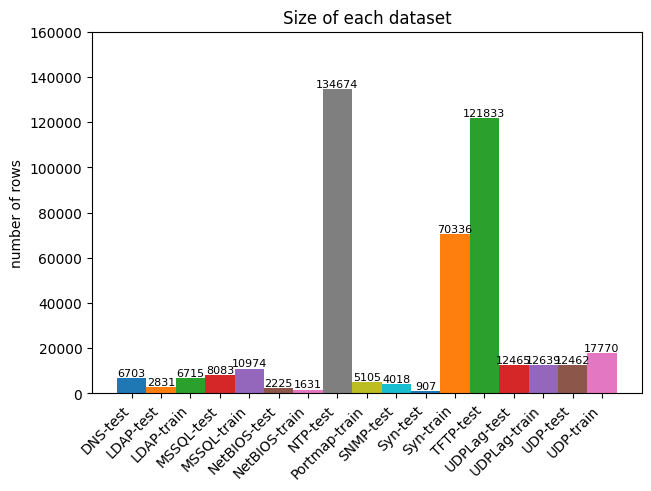

In [3]:
# checking the size of every dataset part

fig, ax = plt.subplots(layout='constrained')
positions = []
dataset_names = []
mult = 0
barWidth = 1

for dataset_name, dataset in cic_ddos2019.items():
    position = barWidth * mult
    dataset_names.append(dataset_name)
    positions.append(position)
    currentBar = ax.bar(position, dataset.shape[0], width=barWidth, label=dataset_name)
    ax.bar_label(currentBar, fontsize=8)
    mult += 1

ax.set_xticks(positions, dataset_names)
ax.set_xticklabels(dataset_names, rotation=45, ha='right')
ax.set_ybound(0,160000)
ax.set_title('Size of each dataset')
ax.set_ylabel('number of rows')

plt.show()

[0, 6715, 10974, 1631, 0, 5105, 0, 70336, 0, 12639, 17770]
[6703, 2831, 8083, 2225, 134674, 0, 4018, 907, 121833, 12465, 12462]


C:\Users\RACYM\AppData\Local\Temp\ipykernel_8636\4143570142.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dataset_names, rotation=45, ha='right')


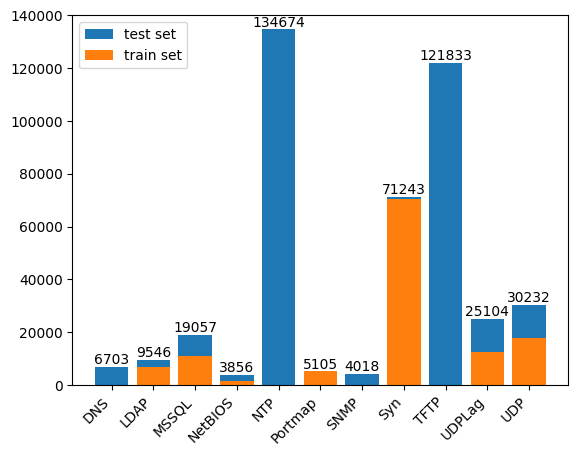

In [4]:
# stacked bars for each dataset train/test data and total

dataset_names = ['DNS', 'LDAP', 'MSSQL', 'NetBIOS', 'NTP','Portmap', 'SNMP', 'Syn', 'TFTP', 'UDPLag', 'UDP']

lenghts_train = [
    0,
    cic_ddos2019['LDAP-train'].shape[0],
    cic_ddos2019['MSSQL-train'].shape[0],
    cic_ddos2019['NetBIOS-train'].shape[0],
    0,
    cic_ddos2019['Portmap-train'].shape[0],
    0,
    cic_ddos2019['Syn-train'].shape[0],
    0,
    cic_ddos2019['UDPLag-train'].shape[0],
    cic_ddos2019['UDP-train'].shape[0]
]
lenghts_test = [
    cic_ddos2019['DNS-test'].shape[0],
    cic_ddos2019['LDAP-test'].shape[0],
    cic_ddos2019['MSSQL-test'].shape[0],
    cic_ddos2019['NetBIOS-test'].shape[0],
    cic_ddos2019['NTP-test'].shape[0],
    0,
    cic_ddos2019['SNMP-test'].shape[0],
    cic_ddos2019['Syn-test'].shape[0],
    cic_ddos2019['TFTP-test'].shape[0],
    cic_ddos2019['UDPLag-test'].shape[0],
    cic_ddos2019['UDP-test'].shape[0]
]
print(lenghts_train)
print(lenghts_test)
lenghts_total = [lenghts_test[i] + lenghts_train[i] for i in range(len(lenghts_test))]


fig, ax = plt.subplots()
topRect = ax.bar(dataset_names, lenghts_test, bottom=lenghts_train, label='test set')
ax.bar(dataset_names, lenghts_train, label='train set')

ax.set_ybound(0,140000)
ax.bar_label(topRect, lenghts_total)
ax.legend()
ax.set_xticklabels(dataset_names, rotation=45, ha='right')

plt.show()


In [5]:
print(cic_ddos2019_all.Label.value_counts())
print(cic_ddos2019_all.shape[0])

Label
DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: count, dtype: int64
431371


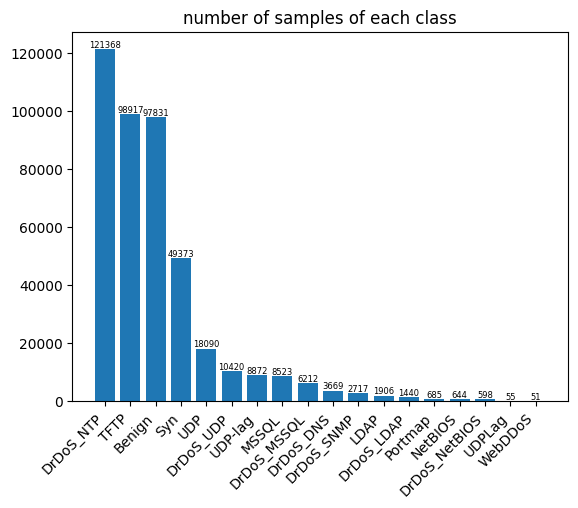

In [6]:
all_classes = ['DrDoS_NTP', 'TFTP', 'Benign', 'Syn', 'UDP', 'DrDoS_UDP', 'UDP-lag', 'MSSQL', 'DrDoS_MSSQL', 'DrDoS_DNS', 'DrDoS_SNMP', 'LDAP', 'DrDoS_LDAP', 'Portmap', 'NetBIOS', 'DrDoS_NetBIOS', 'UDPLag', 'WebDDoS']

fig, ax = plt.subplots()
barContainer = ax.bar(all_classes, cic_ddos2019_all.Label.value_counts().unique())
ax.set_title('number of samples of each class')
ax.set_xticks(range(len(all_classes)))
ax.set_xticklabels(all_classes, rotation=45, ha='right')
ax.bar_label(barContainer, cic_ddos2019_all.Label.value_counts().unique(), fontsize=6)
plt.show()

In [7]:
# creating a balanced portion of the dataset
maxSamples = 1000

balancedParts = []
for label, group in cic_ddos2019_all.groupby('Label'):
    if maxSamples <= len(group):
        sampled_DF = group.sample(n=maxSamples)
    else:
        sampled_DF = group
    balancedParts.append(sampled_DF)
cic_ddos2019_all_balanced = pd.concat(balancedParts, ignore_index=True)

print(cic_ddos2019_all_balanced.shape)

(15033, 78)


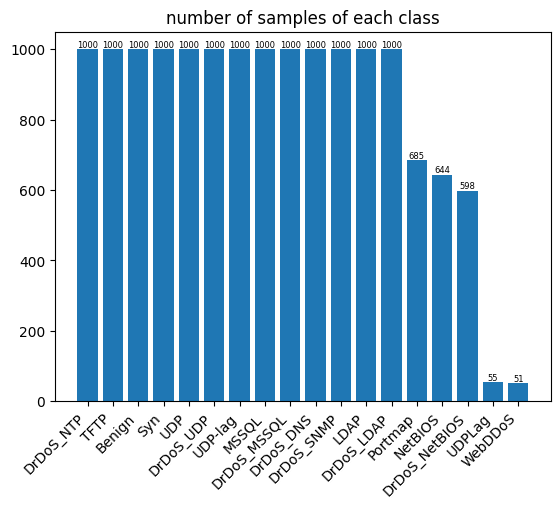

In [8]:
fig, ax = plt.subplots()
barContainer = ax.bar(all_classes, cic_ddos2019_all_balanced.Label.value_counts().values)
ax.set_title('number of samples of each class')
ax.set_xticks(range(len(all_classes)))
ax.set_xticklabels(all_classes, rotation=45, ha='right')
ax.bar_label(barContainer, cic_ddos2019_all_balanced.Label.value_counts().values, fontsize=6)
plt.show()

## using SMOTE to balance the minority classes

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
features_resampled, classes_resampled = smote.fit_resample(cic_ddos2019_all_balanced.iloc[:,:-1], cic_ddos2019_all_balanced.iloc[:,-1])

cic_ddos2019_all_balanced = pd.DataFrame(features_resampled, columns=features_resampled.columns)
cic_ddos2019_all_balanced['Label'] = classes_resampled

cic_ddos2019_all_balanced['Label'].value_counts()


Label
Benign           1000
DrDoS_DNS        1000
DrDoS_LDAP       1000
DrDoS_MSSQL      1000
DrDoS_NTP        1000
DrDoS_NetBIOS    1000
DrDoS_SNMP       1000
DrDoS_UDP        1000
LDAP             1000
MSSQL            1000
NetBIOS          1000
Portmap          1000
Syn              1000
TFTP             1000
UDP              1000
UDP-lag          1000
UDPLag           1000
WebDDoS          1000
Name: count, dtype: int64

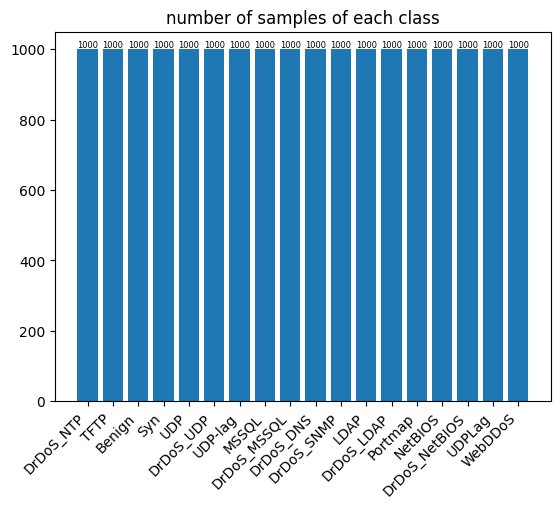

In [10]:
fig, ax = plt.subplots()
barContainer = ax.bar(all_classes, cic_ddos2019_all_balanced.Label.value_counts().values)
ax.set_title('number of samples of each class')
ax.set_xticks(range(len(all_classes)))
ax.set_xticklabels(all_classes, rotation=45, ha='right')
ax.bar_label(barContainer, cic_ddos2019_all_balanced.Label.value_counts().values, fontsize=6)
plt.show()

# TSNE Plot

In [11]:
# visualizing the balanced dataset
balanced_dataset = cic_ddos2019_all_balanced.to_numpy()
features = balanced_dataset[:,:-1]
classes = balanced_dataset[:,-1]

# features_reduces = TSNE(n_components=2).fit_transform(features)    # takes 1min30 for 15k samples


In [12]:
print(classes)

# mapping the label names into numbers so that they can be use to assign colors for each class
labelMap = {'DrDoS_NTP':0, 'TFTP':1, 'Benign':2, 'Syn':3, 'UDP':4, 'DrDoS_UDP':5, 'UDP-lag':6, 'MSSQL':7, 'DrDoS_MSSQL':8, 'DrDoS_DNS':9, 'DrDoS_SNMP':10, 'LDAP':11, 'DrDoS_LDAP':12, 'Portmap':13, 'NetBIOS':14, 'DrDoS_NetBIOS':15, 'UDPLag':16, 'WebDDoS':16}
classes_mapped = [labelMap[label] for label in classes]

print(classes_mapped[:20])

['Benign' 'Benign' 'Benign' ... 'WebDDoS' 'WebDDoS' 'WebDDoS']
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


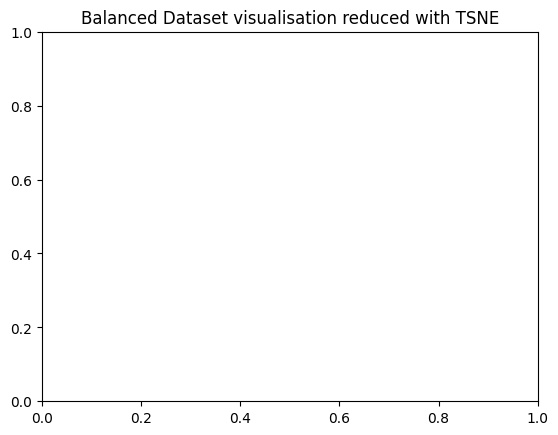

In [13]:
fig, ax = plt.subplots()
# ax.scatter(features_reduces[:,0], features_reduces[:,1], c=classes_mapped, label=classes)
ax.set_title('Balanced Dataset visualisation reduced with TSNE')
plt.show()

# Correlation Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

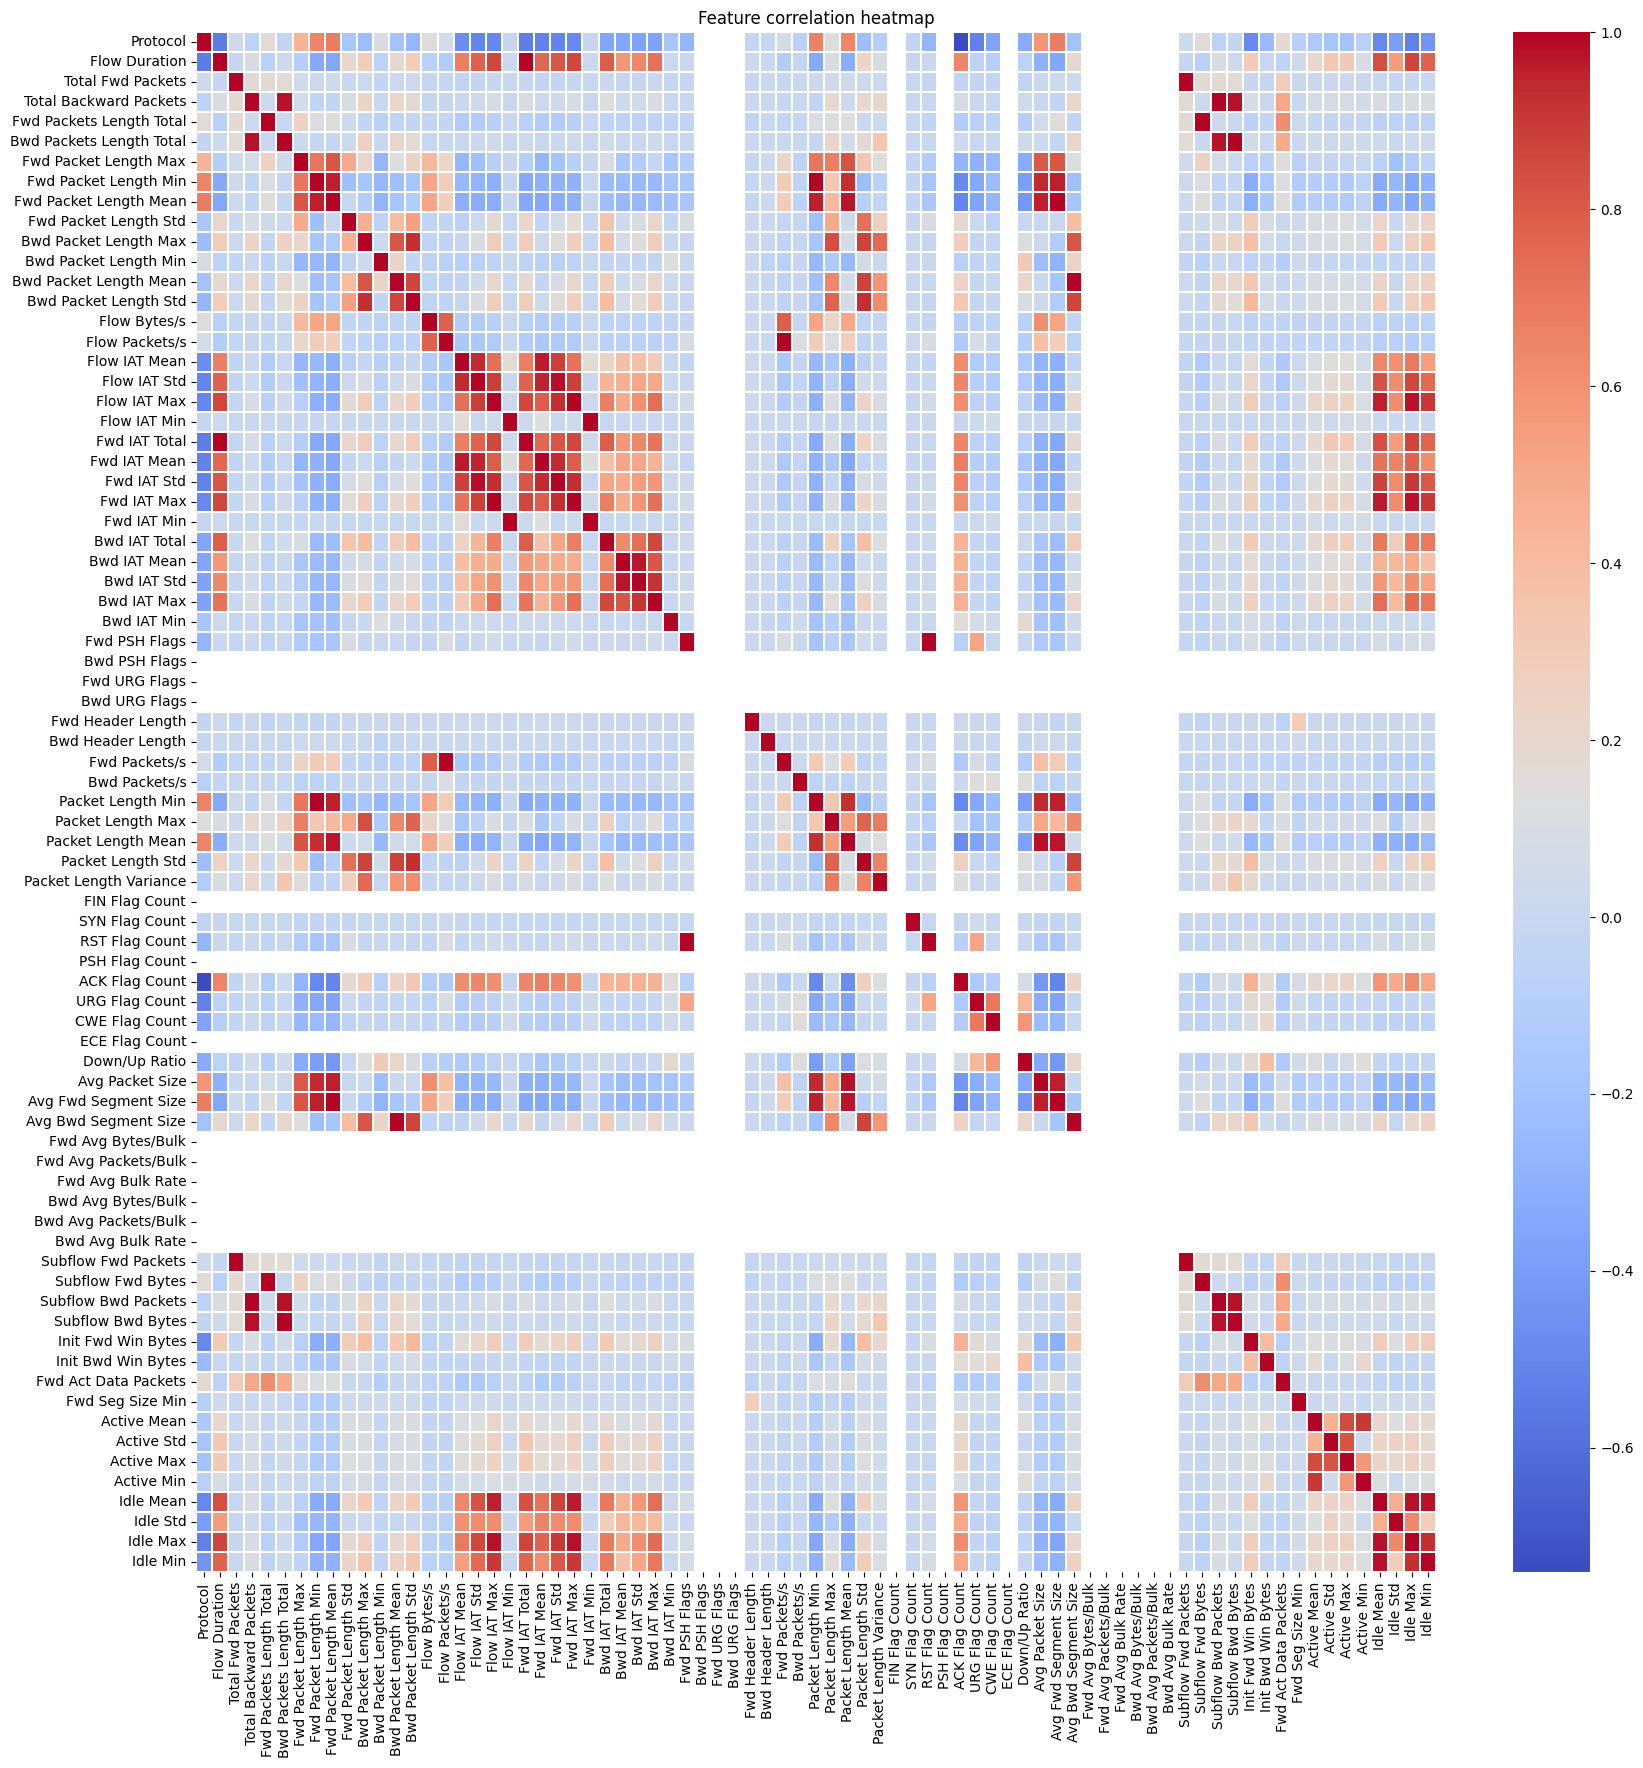

In [14]:
correlation = cic_ddos2019_all.iloc[:,:-1].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cmap='coolwarm', linewidths=0.1)
plt.title('Feature correlation heatmap')
plt.show

In [15]:
# getting the column where correlation > 95
triCorrMatrix = correlation.abs().where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
highCorr = [column for column in triCorrMatrix.columns if any(triCorrMatrix[column]>0.9) ]

print(len(highCorr))
print(highCorr)

27
['Bwd Packets Length Total', 'Fwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Std', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Packets/s', 'Packet Length Min', 'Packet Length Mean', 'Packet Length Std', 'RST Flag Count', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']


In [16]:
# dropping the columns that contain high correlation values
print(len(cic_ddos2019_all.iloc[:,:-1].columns))
newFeatures = cic_ddos2019_all.iloc[:,:-1].drop(columns=highCorr, axis=1)
print(len(newFeatures.columns))

# dropping useless columns
newFeatures.drop(['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate'], axis=1, inplace=True)

77
50


<function matplotlib.pyplot.show(close=None, block=None)>

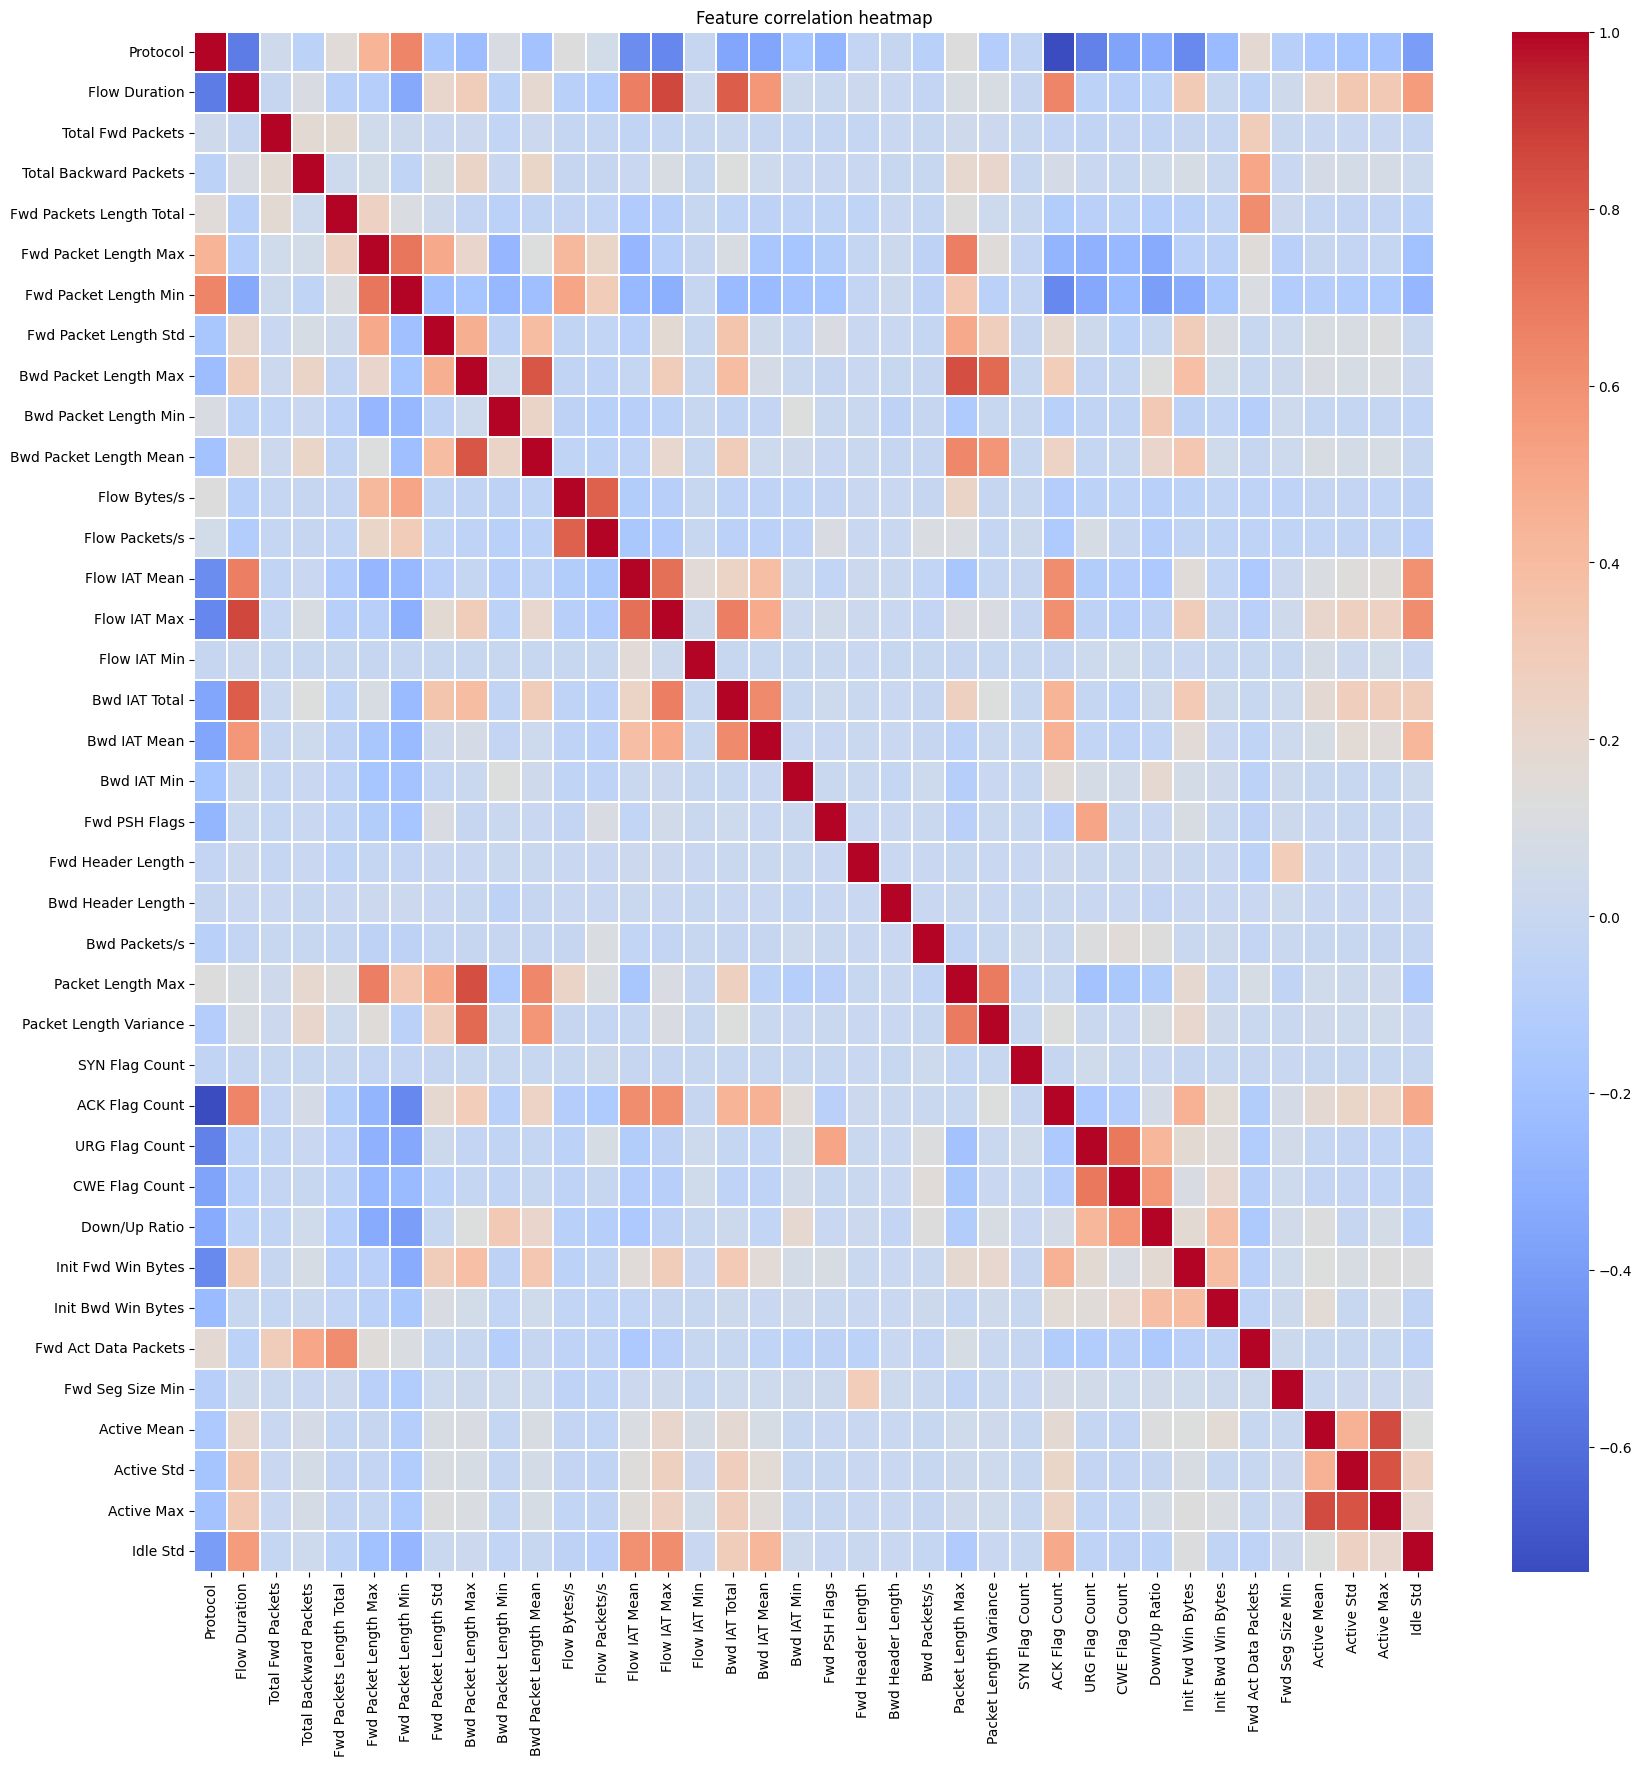

In [17]:
newCorrelation = newFeatures.corr()
plt.figure(figsize=(20,20))
sns.heatmap(newCorrelation, cmap='coolwarm', linewidths=0.1)
plt.title('Feature correlation heatmap')
plt.show

# Outlier Detection

## Standard deviation for each feature

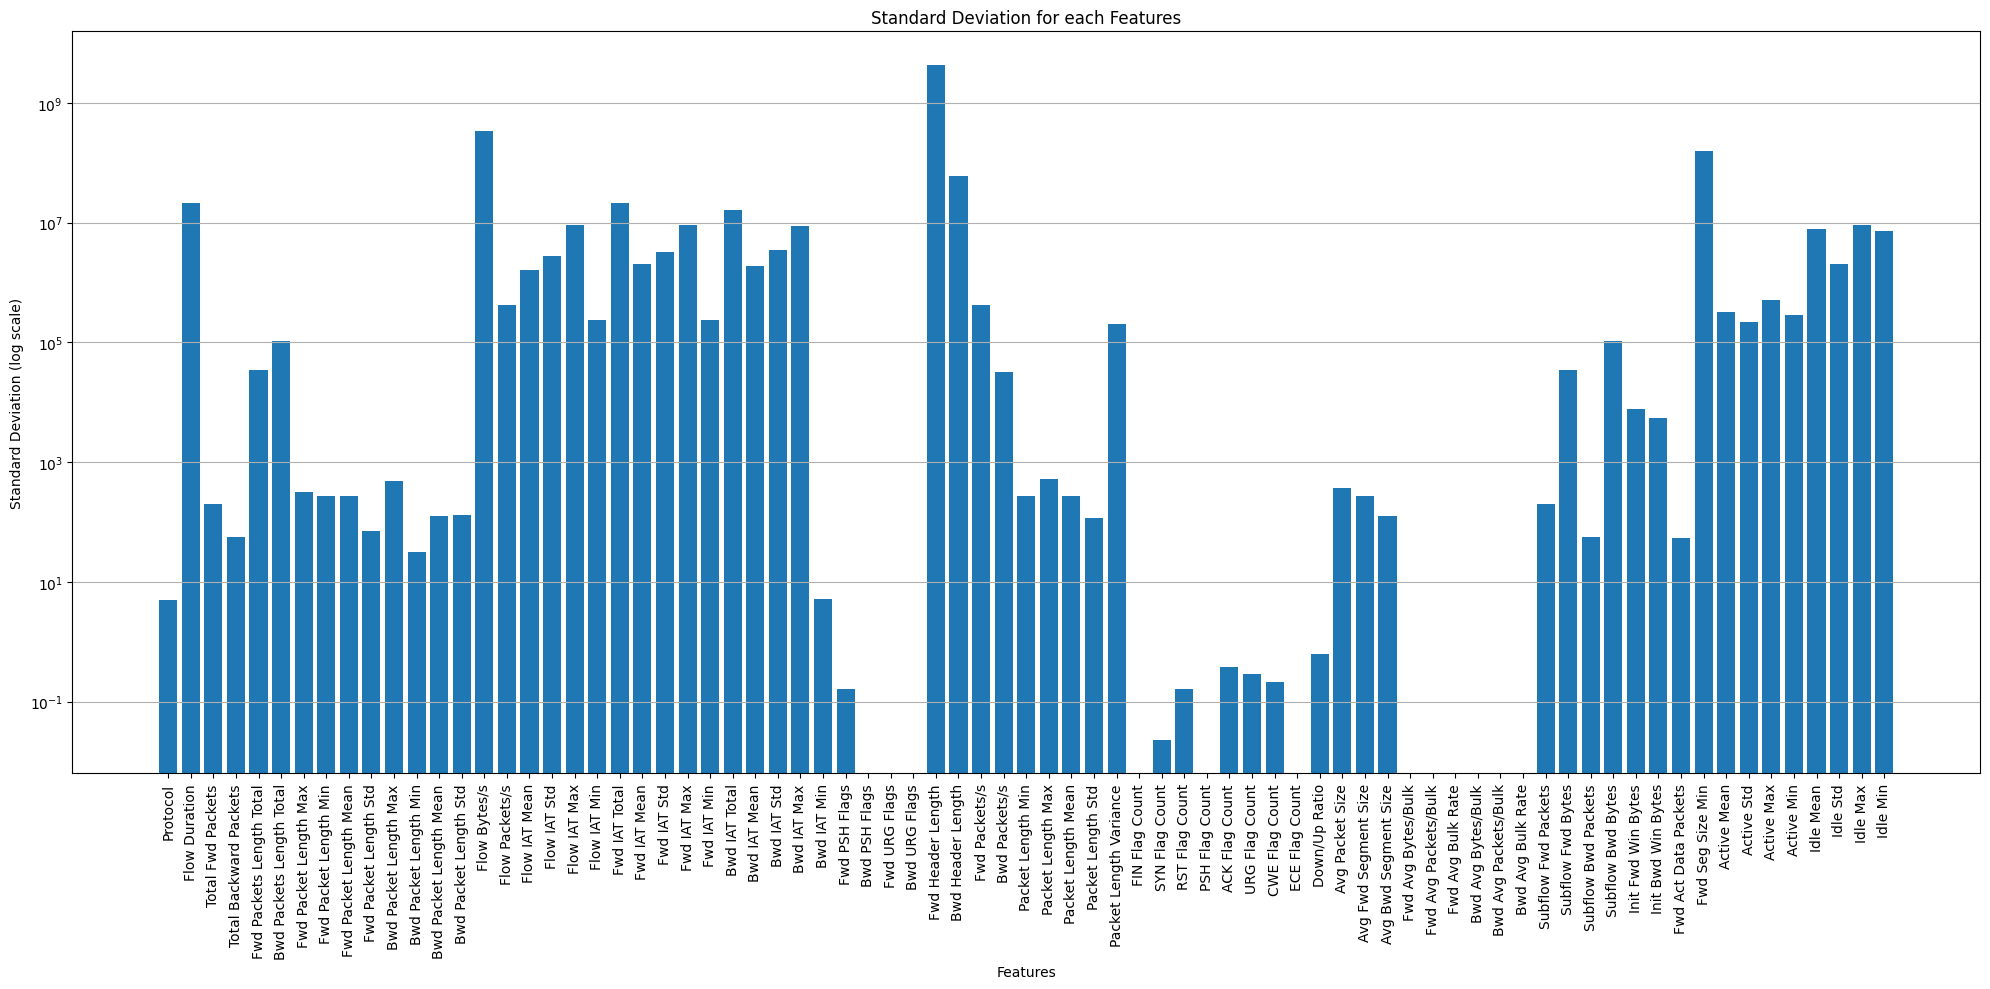

In [18]:
features = cic_ddos2019_all.iloc[:, :-1]
# features = cic_ddos2019_all_balanced.iloc[:, :-1]

features_names = np.array(features.columns)

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(features_names, features.std())
ax.set_yscale('log')
ax.grid(axis='y')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Standard Deviation (log scale)')
plt.title('Standard Deviation for each Features')
plt.tight_layout()
plt.show()

## Same graph but horizontal

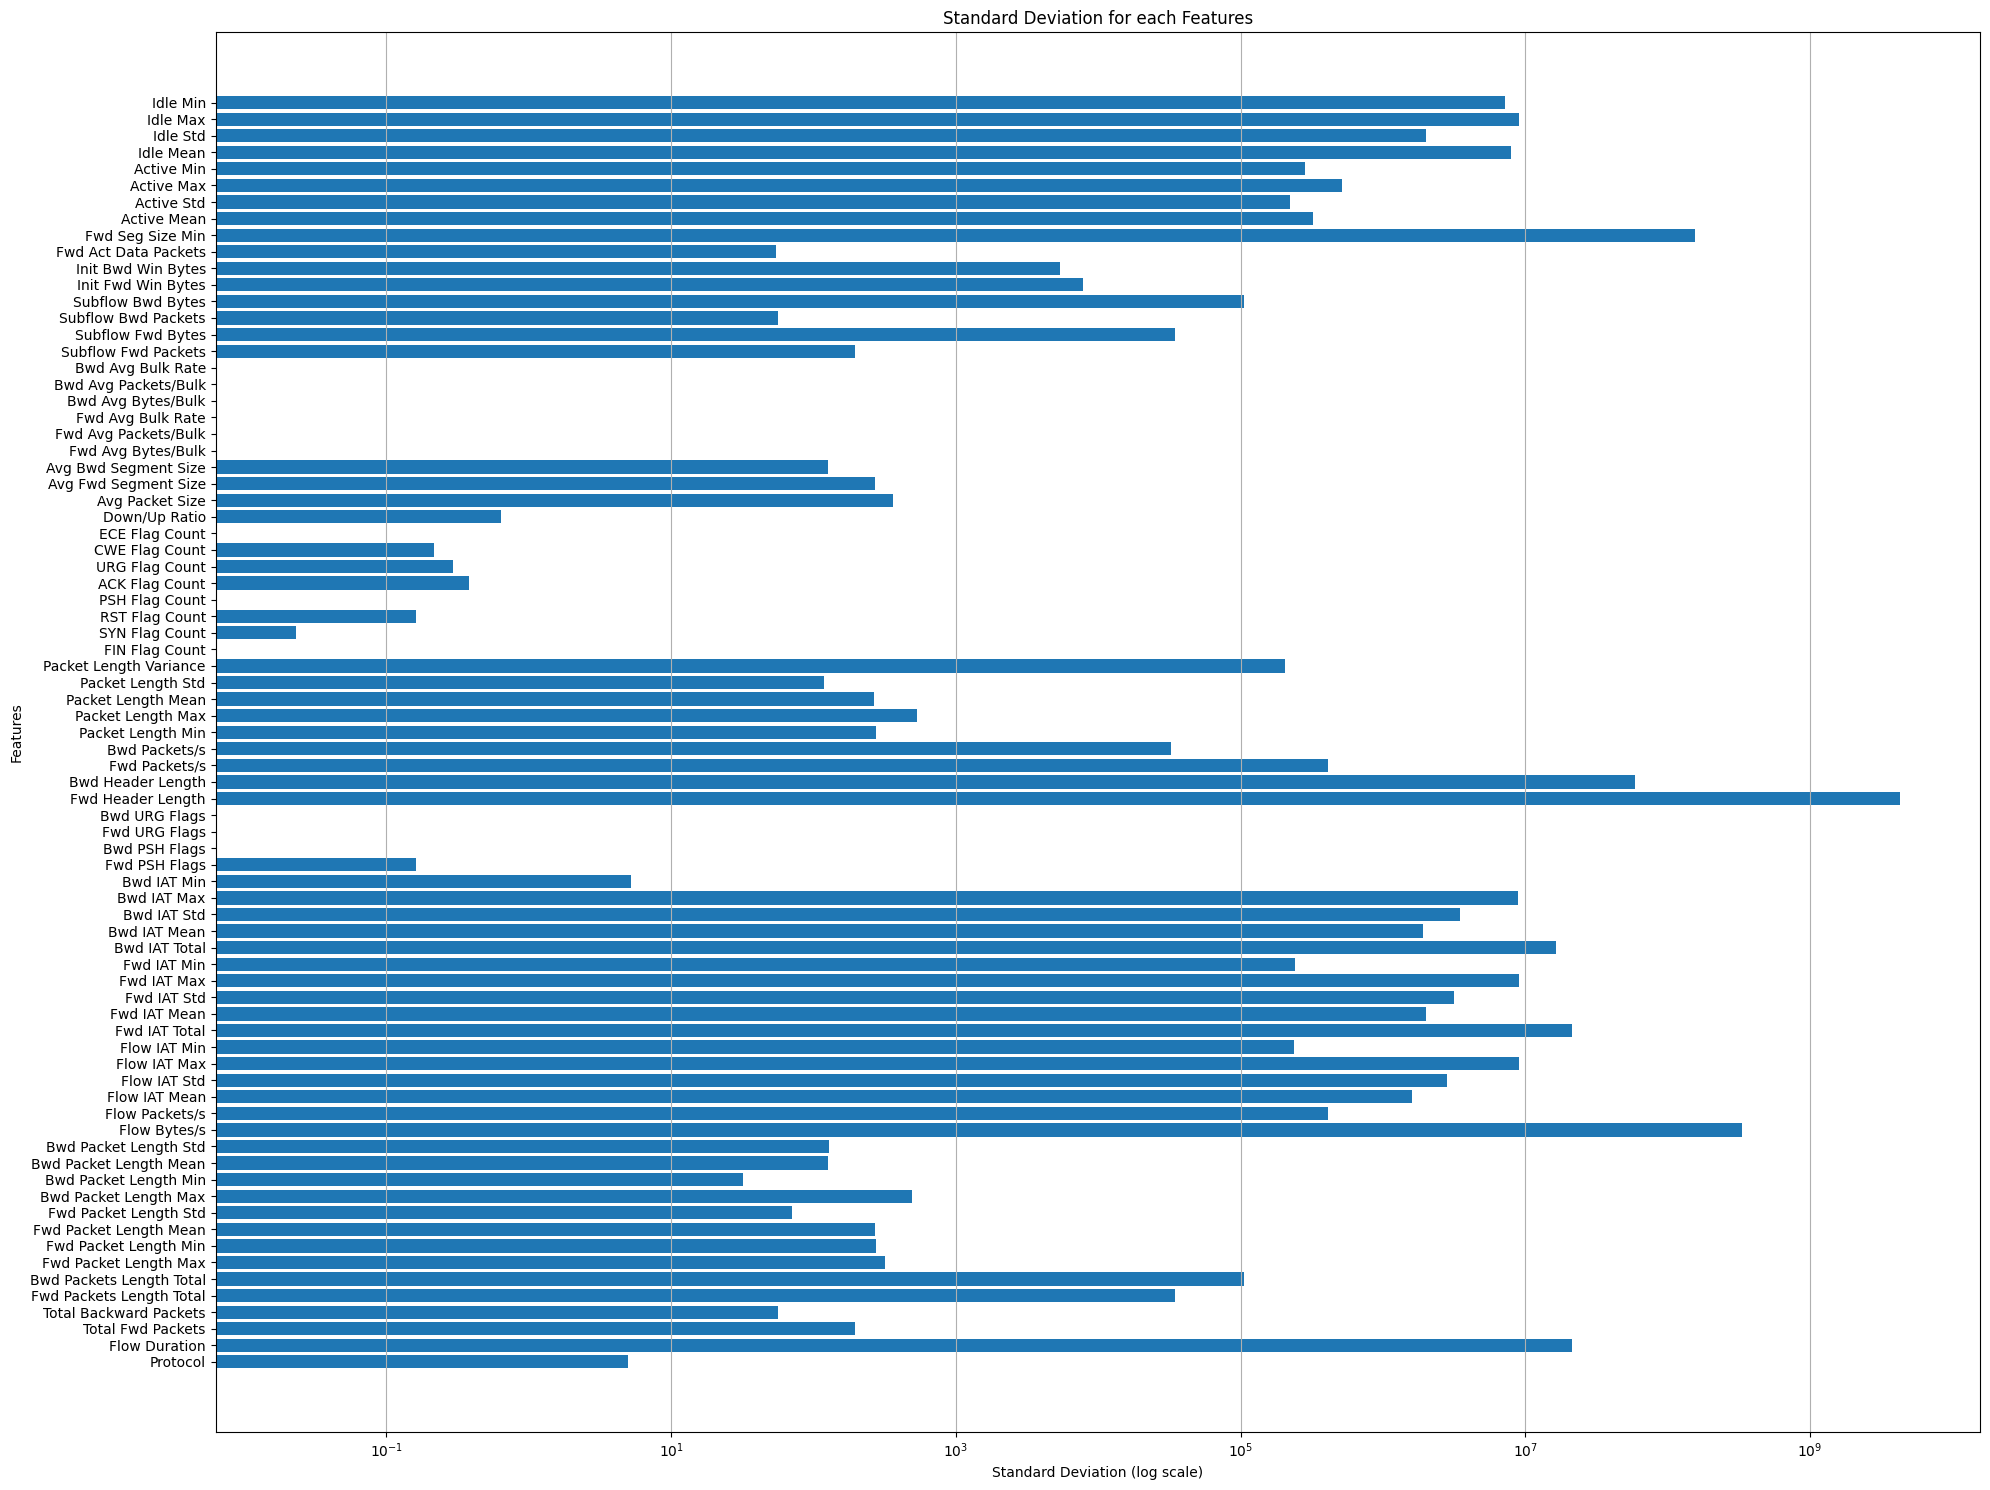

In [19]:
fig, ax = plt.subplots(figsize=(20,15))
ax.barh(features_names, features.std())
ax.set_xscale('log')
ax.grid(axis='x')
plt.ylabel('Features')
plt.xlabel('Standard Deviation (log scale)')
plt.title('Standard Deviation for each Features')
plt.tight_layout()
plt.show()

In [20]:
constant_features = features.std()[features.std() == 0].index.tolist()
constant_features

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

## Box Plot for each feature

In [21]:
features.var()

Protocol                    2.466823e+01
Flow Duration               4.522411e+14
Total Fwd Packets           3.837246e+04
Total Backward Packets      3.177600e+03
Fwd Packets Length Total    1.186977e+09
                                ...     
Active Min                  8.020288e+10
Idle Mean                   6.263155e+13
Idle Std                    4.020685e+12
Idle Max                    8.181794e+13
Idle Min                    5.249815e+13
Length: 77, dtype: float64

In [22]:
cic_ddos2019_all.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,431371.000000,...,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,431371.0,4.313710e+05,431371.0,431371.0
mean,13.948694,8.404856e+06,24.139117,2.472021,9.416957e+03,1.632896e+03,357.483673,294.721649,324.915314,20.208252,...,21.893124,-2.315406e+07,3.370905e+04,2.563696e+04,6.757180e+04,1.868363e+04,2449924.0,4.983263e+05,2971143.0,1993858.5
std,4.966712,2.126596e+07,195.888896,56.370208,3.445254e+04,1.064056e+05,320.025940,273.298706,268.577301,70.946083,...,54.559772,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7914009.5,2.005164e+06,9045327.0,7245560.5
min,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
25%,6.000000,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,0.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
50%,17.000000,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,0.000000,...,3.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
75%,17.000000,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,0.000000,...,13.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
max,17.000000,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290527,2221.556152,...,18766.000000,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,119219448.0,6.961402e+07,119219448.0,119219448.0


In [23]:
balanced_all = (features-features.mean())/features.std()
# balanced_all = (features - features.min()) / (features.max() - features.min())

In [24]:
balanced_all.drop(['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate'], axis=1, inplace=True)

In [25]:
balanced_all.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,...,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05
mean,-5.270954e-17,1.370448e-17,-2.661832e-17,1.581286e-18,-1.652067e-08,-2.049515e-09,3.281664e-09,-1.292763e-08,4.994721e-08,9.967488e-08,...,1.033107e-16,-7.511110e-18,4.905039e-10,3.078733e-08,1.350176e-08,4.645862e-09,-1.563810e-08,-1.807283e-08,-6.505383e-08,4.422537e-08
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.808436e+00,-3.952257e-01,-1.181237e-01,-4.385332e-02,-2.733313e-01,-1.534595e-02,-1.117046e+00,-1.078387e+00,-1.209765e+00,-2.848396e-01,...,-4.012686e-01,-8.925915e+00,-1.045852e-01,-1.151424e-01,-1.303534e-01,-6.597301e-02,-3.095680e-01,-2.485214e-01,-3.284727e-01,-2.751835e-01
25%,-1.600394e+00,-3.951888e-01,-1.028089e-01,-4.385332e-02,-2.710673e-01,-1.534595e-02,-1.001430e+00,-1.056433e+00,-1.090618e+00,-2.848396e-01,...,-3.829401e-01,1.492121e-01,-1.045852e-01,-1.151424e-01,-1.303534e-01,-6.597301e-02,-3.095680e-01,-2.485214e-01,-3.284727e-01,-2.751835e-01
50%,6.143514e-01,-3.931190e-01,-1.028089e-01,-4.385332e-02,-2.134228e-01,-1.534595e-02,2.578426e-01,1.290835e-01,3.838176e-01,-2.848396e-01,...,-3.462831e-01,1.492122e-01,-1.045852e-01,-1.151424e-01,-1.303534e-01,-6.597301e-02,-3.095680e-01,-2.485214e-01,-3.284727e-01,-2.751835e-01
75%,6.143514e-01,-2.540374e-01,-4.154966e-02,-8.373583e-03,-1.235601e-01,-1.534595e-02,4.953234e-01,8.096575e-01,7.114700e-01,-2.848396e-01,...,-1.629978e-01,1.492122e-01,-1.045852e-01,-1.151424e-01,-1.303534e-01,-6.597301e-02,-3.095680e-01,-2.485214e-01,-3.284727e-01,-2.751835e-01
max,6.143514e-01,5.247536e+00,4.423010e+02,5.623099e+02,4.428411e+02,5.491050e+02,9.924982e+01,6.718943e+00,1.001714e+01,3.102846e+01,...,3.435518e+02,5.825308e-01,1.255749e+02,9.578437e+01,8.771489e+01,1.429702e+02,1.475479e+01,3.446884e+01,1.285175e+01,1.617895e+01


65


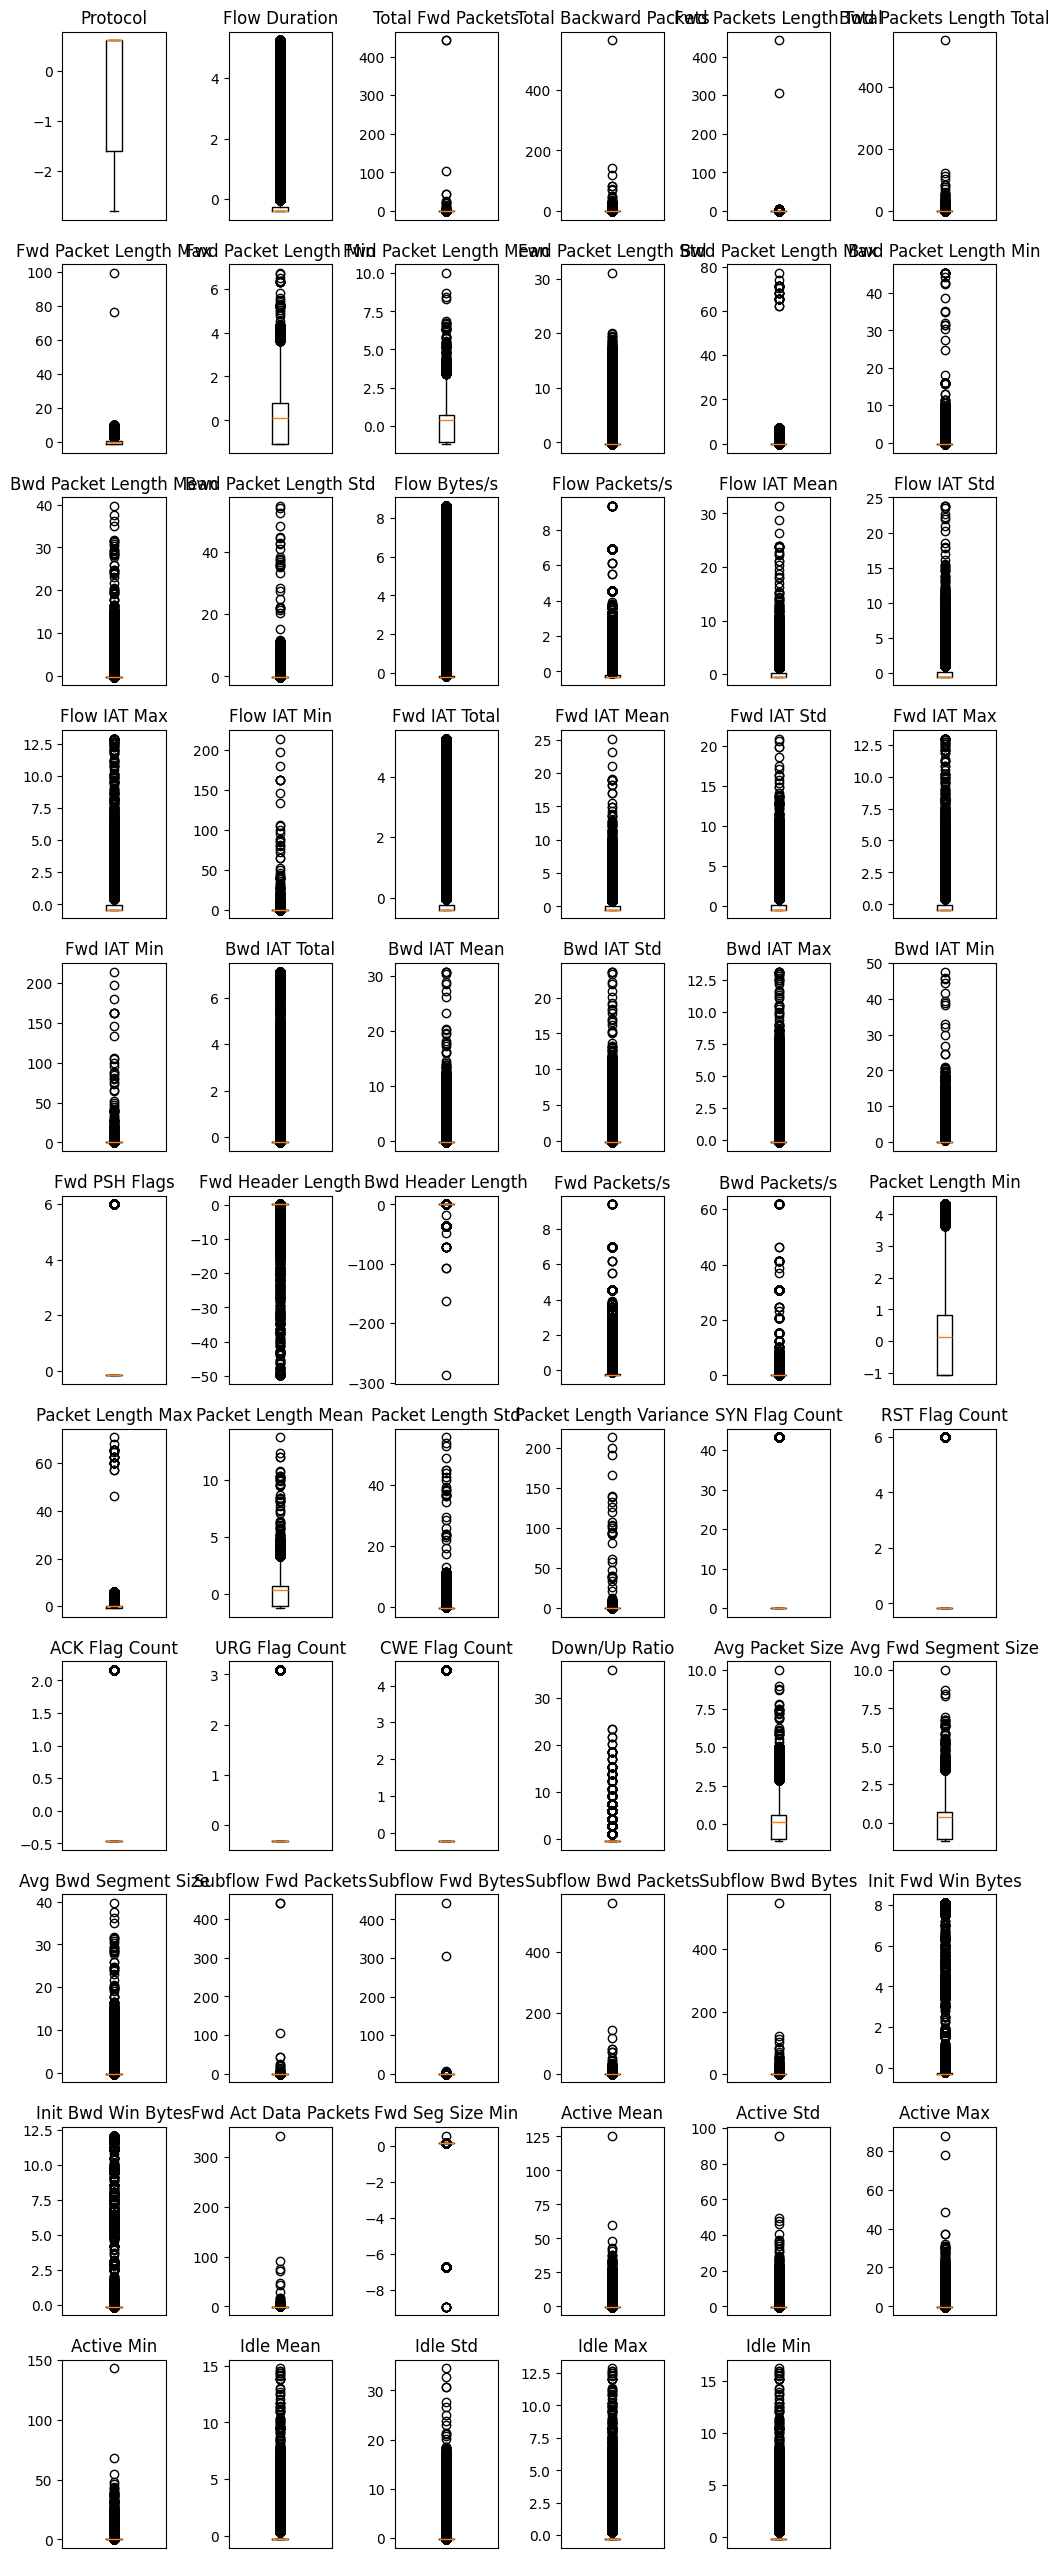

In [26]:
# generates a figure for each plot
# group_size = 1
# for i in range(0, len(balanced_all.columns), group_size):
#     subset = balanced_all.iloc[:, i:i + group_size]
#     subset.plot(kind='box', figsize=(15, 6), showfliers=False)
#     plt.title(f'Boxplot for Features {i+1} to {min(i+group_size, len(features.columns))}')
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()

print(len(balanced_all.columns))

plt.figure(figsize=(10,35))
for i in range(len(balanced_all.columns)):
    plt.subplot(15, 6, i+1)
    plt.title(balanced_all.columns[i])
    plt.boxplot(balanced_all[balanced_all.columns[i]], showfliers=True)
    plt.xticks([])
plt.tight_layout()
plt.show()

In [27]:
column_names = balanced_all.columns.tolist()
print(len(column_names))
print(column_names)



for column in column_names:
    Q1 = balanced_all[column].quantile(0.25)
    Q2 = balanced_all[column].quantile(0.5)
    Q3 = balanced_all[column].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    upper_outliers = balanced_all[balanced_all[column] > upper_bound].shape[0]
    lower_outliers = balanced_all[balanced_all[column] < lower_bound].shape[0]

    print('{} = {} (upper) + {} (lower)       {}'.format(upper_outliers + lower_outliers, upper_outliers, lower_outliers, column))

65
['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subfl

In [28]:
print(balanced_all['Fwd PSH Flags'].value_counts())
print(balanced_all['Fwd PSH Flags'].loc[-0.167065])

Fwd PSH Flags
-0.167065    419658
 5.985676     11713
Name: count, dtype: int64


KeyError: -0.167065

65


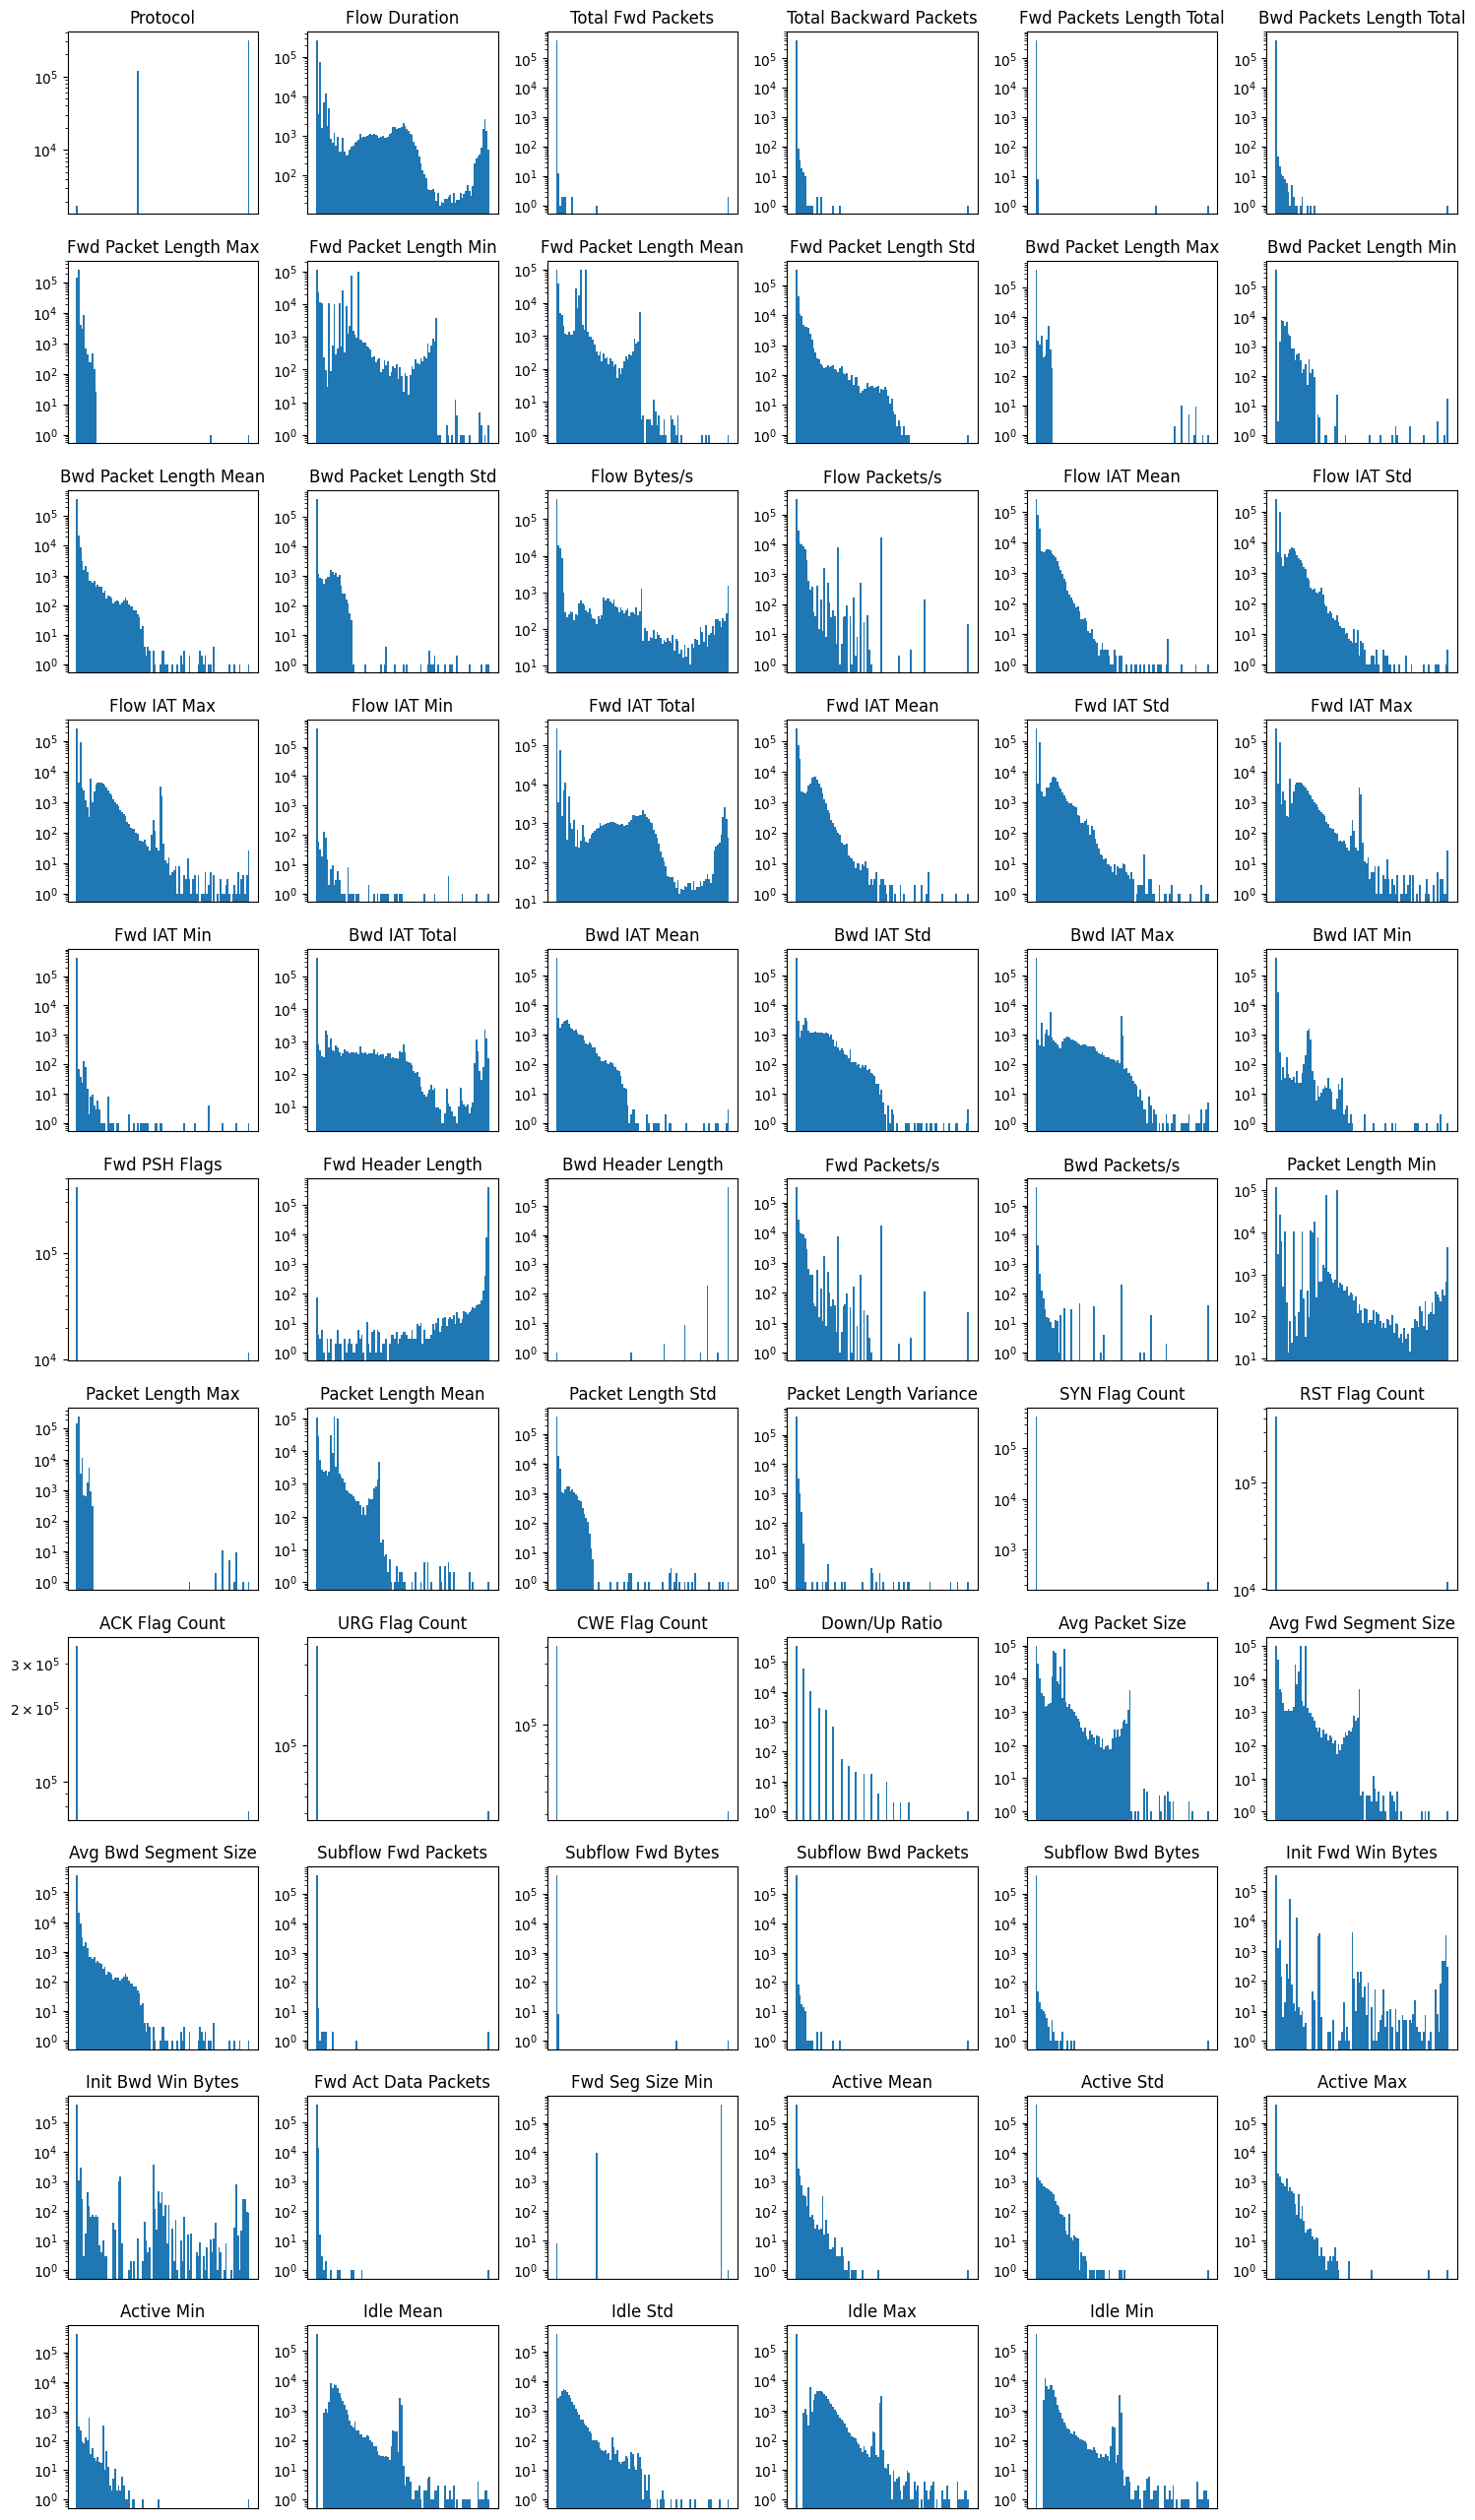

In [ ]:
print(len(balanced_all.columns))

plt.figure(figsize=(15,35))
for i in range(len(balanced_all.columns)):
    plt.subplot(15, 6, i+1)
    plt.title(balanced_all.columns[i])
    counts, bins, patches = plt.hist(balanced_all[balanced_all.columns[i]], 100)
    plt.yscale('log')
    plt.xticks([])
plt.tight_layout()
plt.show()

# counts, bins, patches = plt.hist(balanced_all['Fwd Header Length'], 100)
# plt.yscale('log')
# plt.show()